# **Predicting Climate Model Outcomes Using Logistic Regression and Support Vector Machines**
### Lakota Nguyen, UID 605613001
### Dr. Alexander Lozinski, TA Dominique Stumbaugh
### AOS C111/C204, Fall 2023

Link to dataset: https://doi.org/10.24432/C5HG71



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
filepath='/content/drive/MyDrive/Colab Notebooks/AOS 111: Machine Learning/Final Project/pop_failures.dat' #defining file path

Mounted at /content/drive


In [4]:
# Visualizing the data
with open(filepath, 'r') as file:
    data = file.read()
    print(data)

# Here, we see that the dataset groups all study instances together, we must split them up

Study      Run             vconst_corr                vconst_2                vconst_3                vconst_4                 vconst_5                vconst_7                 ah_corr               ah_bolus                slm_corr       efficiency_factor           tidal_mix_max      vertical_decay_scale            convect_corr            bckgrnd_vdc1          bckgrnd_vdc_ban          bckgrnd_vdc_eq        bckgrnd_vdc_psim                 Prandtl   outcome
    1        1      0.8590362064372231      0.9278245357602525      0.2528656223672442       0.298838311199668       0.1705212998954166       0.735936040913738      0.4283254278810799     0.5679469417703027      0.4743695999935477      0.2456748547110086      0.1042258652974851        0.8690907029810155      0.9975184956319734      0.4486200774528293       0.3075217871189428      0.8583103652138057      0.7969972396308247      0.8698930381357464         0
    1        2      0.6060410252371287      0.4577283627625244      0.3594484227

In [8]:
# Creating pandas data frame
df = pd.read_csv(filepath, sep='\s+')
print(df.head())

rows, columns = df.shape
print(f'The DataFrame has {rows} rows and {columns} columns.')

df.describe()

df.head(5)

   Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_7  \
0      1    1     0.859036  0.927825  0.252866  0.298838  0.170521  0.735936   
1      1    2     0.606041  0.457728  0.359448  0.306957  0.843331  0.934851   
2      1    3     0.997600  0.373238  0.517399  0.504993  0.618903  0.605571   
3      1    4     0.783408  0.104055  0.197533  0.421837  0.742056  0.490828   
4      1    5     0.406250  0.513199  0.061812  0.635837  0.844798  0.441502   

    ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
0  0.428325  0.567947  ...           0.245675       0.104226   
1  0.444572  0.828015  ...           0.616870       0.975786   
2  0.746225  0.195928  ...           0.679355       0.803413   
3  0.005525  0.392123  ...           0.471463       0.597879   
4  0.191926  0.487546  ...           0.551543       0.743877   

   vertical_decay_scale  convect_corr  bckgrnd_vdc1  bckgrnd_vdc_ban  \
0              0.869091      0.997518      0.448620         0.

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [9]:
# Splitting data by study number
# Grouping data by 'Study' column
group = df.groupby('Study')

# Creating individual groups
study_1, study_2, study_3 = [group for _, group in group]

print("Study 1:")
print(study_1)
print()
print("Study 2:")
print(study_2)
print()
print("Study 3:")
print(study_3)

Study 1:
     Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  \
0        1    1     0.859036  0.927825  0.252866  0.298838  0.170521   
1        1    2     0.606041  0.457728  0.359448  0.306957  0.843331   
2        1    3     0.997600  0.373238  0.517399  0.504993  0.618903   
3        1    4     0.783408  0.104055  0.197533  0.421837  0.742056   
4        1    5     0.406250  0.513199  0.061812  0.635837  0.844798   
..     ...  ...          ...       ...       ...       ...       ...   
175      1  176     0.764097  0.138629  0.455829  0.846745  0.810821   
176      1  177     0.626563  0.816333  0.161814  0.481314  0.762260   
177      1  178     0.151311  0.704704  0.239547  0.783364  0.884157   
178      1  179     0.187761  0.040816  0.322789  0.448650  0.074727   
179      1  180     0.119935  0.003105  0.264193  0.936009  0.511536   

     vconst_7   ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
0    0.735936  0.428325  0.567947  ...           0

In [12]:
# Studies 1-3
# Extrapolating target variable (0 = failure, 1 = success)
y_1 = study_1['outcome']
y_2 = study_2['outcome']
y_3 = study_3['outcome']


# Dropping unnecessary columns
columns_drop = ['Study', 'Run', 'outcome']
df_dropped = df.drop(columns=columns_drop)

# Getting feature variables
x_1 = study_1.drop(columns=columns_drop)
x_2 = study_2.drop(columns=columns_drop)
x_3 = study_3.drop(columns=columns_drop)

print('x_3 shape:', x_3.shape)
print('y_3 shape:', y_3.shape)

# Getting target and feature variables for entire dataset (combining 3 studies)
y_tot = df['outcome']
x_tot = df.drop(columns=columns_drop)

print('x_tot and y_tot shape:', x_tot.shape, y_tot.shape)

x_3 shape: (180, 18)
y_3 shape: (180,)
x_tot and y_tot shape: (540, 18) (540,)


In [13]:
# Obtaining testing and training data
from sklearn.model_selection import train_test_split

testsize= 0.28

# For 3 studies
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=testsize, random_state=75)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=testsize, random_state=75)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=testsize, random_state=75)

# For entire dataset (combining 3 studies)
x_train_tot, x_test_tot, y_train_tot, y_test_tot = train_test_split(x_tot, y_tot, test_size=testsize, random_state=75)

print("x training data shape:")
print("",x_train_1.shape, x_train_2.shape, x_train_3.shape, x_train_tot.shape)
print()
print("y training data shape:")
print("",y_train_1.shape, y_train_2.shape, y_train_3.shape, y_train_tot.shape)
print()
print("x testing data shape:")
print("",x_test_1.shape, x_test_2.shape, x_test_3.shape, x_test_tot.shape)
print()
print("y testing data shape:")
print("",y_test_1.shape, y_test_2.shape, y_test_3.shape, y_test_tot.shape)

x training data shape:
 (129, 18) (129, 18) (129, 18) (388, 18)

y training data shape:
 (129,) (129,) (129,) (388,)

x testing data shape:
 (51, 18) (51, 18) (51, 18) (152, 18)

y testing data shape:
 (51,) (51,) (51,) (152,)


# Logistic Regression

In [14]:
# Training 4 logistic regression models simutaneously

## Utilized ChatGPT. Question asked:
## "I have 3 sets of traintestsplit data. I want to train a model on each of these sets simutaneously such that I get 3 models that are trained on the respective data.
## How do I do this for logistic regression?"

from sklearn.linear_model import LogisticRegression
import multiprocessing

# Putting all training data into 1 array
train_data = [(x_train_1, y_train_1), (x_train_2, y_train_2), (x_train_3, y_train_3), (x_train_tot, y_train_tot)]

# Creating LR training function
def train_logistic_regression(data):
  X, Y = data
  lr = LogisticRegression(max_iter=2000)
  lr.fit(X, Y)
  return lr

# Simutaneously training the 4 models on respective data
processes = [multiprocessing.Process(target = train_logistic_regression, args = (data,)) for data in train_data]

for process in processes:
  process.start()

for process in processes:
  process.join()

# Putting all trained models into one variable
trained_models_lr = [train_logistic_regression(data) for data in train_data]

print(trained_models_lr)

[LogisticRegression(max_iter=2000), LogisticRegression(max_iter=2000), LogisticRegression(max_iter=2000), LogisticRegression(max_iter=2000)]


In [15]:
# Getting accuracy of each model

## Question asked to ChatGPT:
## "Now I want to get the accuracy of each of the 3 models using lr.score(x_test, y_test). How do I do that?"

# Putting all test data into 1 array
test_data = [(x_test_1, y_test_1), (x_test_2, y_test_2), (x_test_3, y_test_3), (x_test_tot, y_test_tot)]

# Creating empty array to be filled
accuracies_lr = []

for lr, (x_test, y_test) in zip(trained_models_lr, test_data):
    accuracy = lr.score(x_test, y_test)
    accuracies_lr.append(accuracy)

# Printing accuracies of each model
for i, accuracy in enumerate(accuracies_lr):
    print(f'Study {i + 1} Accuracy: {accuracy:.4f}')

# Stusy 4 is overall accuracy)

Study 1 Accuracy: 0.8824
Study 2 Accuracy: 0.9804
Study 3 Accuracy: 0.9608
Study 4 Accuracy: 0.9539


In [16]:
# Calculating instances of model failure (target variable = 0)

count_of_zeros = y_train_2.value_counts().get(0, 0)
count_of_zeros_te = y_test_2.value_counts().get(0, 0)

print(f"Number of 0s in y_train_2: {count_of_zeros}")
print(f"Number of 0s in y_test_2: {count_of_zeros_te}")

## Problem: for testsize = 0.2: training data had failures (0s) but test data had none (no 0s), cannot do confusion matrix
## Solution: testsize = 0.28

Number of 0s in y_train_2: 11
Number of 0s in y_test_2: 1


### Confusion Matrix - LR

Precision- Study 1: 0.8823529411764706
Recall- Study 1: 1.0

Precision- Study 2: 0.9803921568627451
Recall- Study 2: 1.0

Precision- Study 3: 0.9607843137254902
Recall- Study 3: 1.0

Precision- Study 4: 0.959731543624161
Recall- Study 4: 0.9930555555555556



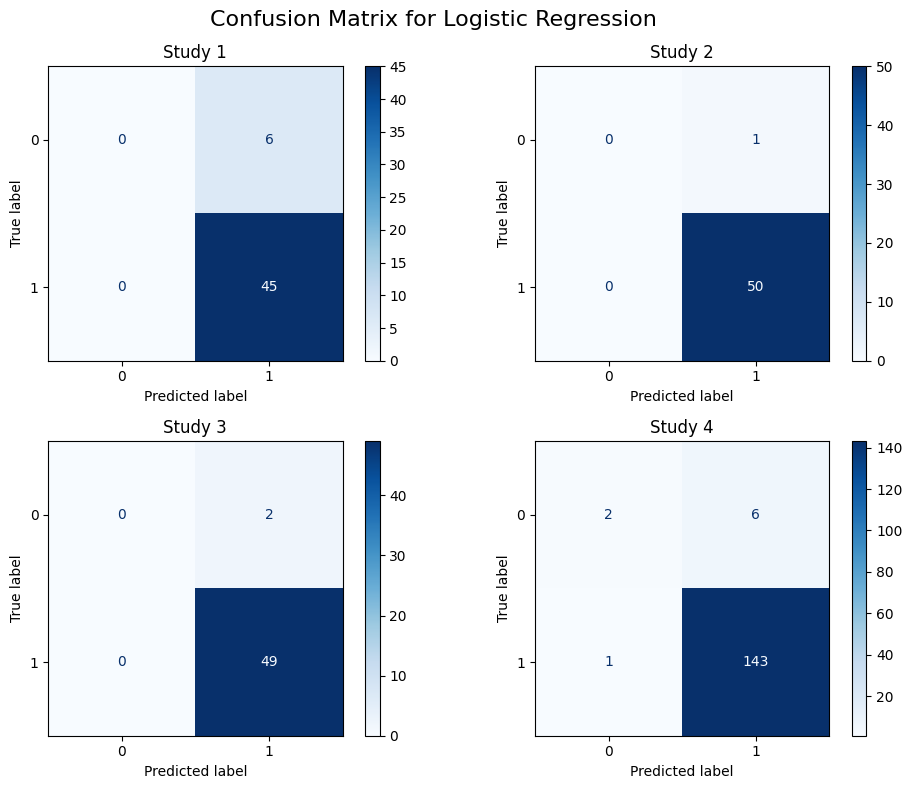

In [17]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creating 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flattening axs to easily iterate
axes = axes.flatten()

# Calculating 4 confusion matrices simutaneously
for i, (models, (x_test, y_test)) in enumerate(zip(trained_models_lr, test_data)):
    # Predicting model on test data
    y_pred = models.predict(x_test)

    # Creating confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix on the i-th subplot
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models.classes_)
    display.plot(cmap='Blues', values_format='d', ax=axes[i])
    axes[i].set_title(f'Study {i+1}')

    # Extra: Calculating Precision
    precision = cm[1,1] / (cm[1,1] + cm[0,1])

    # Calculating Recall
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    print(f'Precision- Study {i+1}:',precision)
    print(f'Recall- Study {i+1}:',recall)
    print()

# Making overall title and adjusting layout
fig.suptitle('Confusion Matrix for Logistic Regression', fontsize=16)
plt.tight_layout()
plt.show()

## Analysis: What does confusion matrix tell us?

### ROC curve - LR

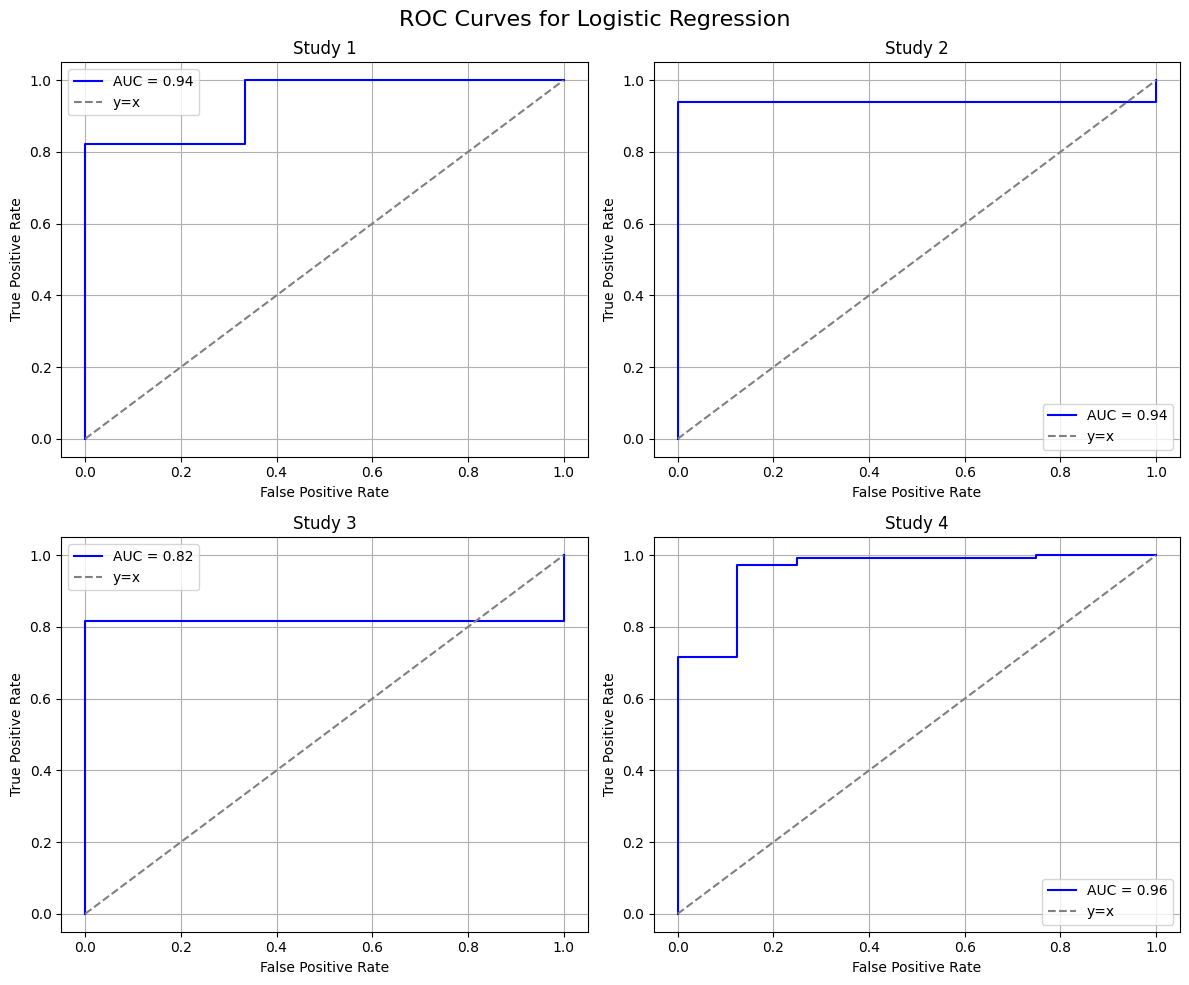

In [18]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Creating 2x2 subplots & flattening axs to iterate
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Recall:
test_data = [(x_test_1, y_test_1), (x_test_2, y_test_2), (x_test_3, y_test_3), (x_test_tot, y_test_tot)]
trained_models_lr = [train_logistic_regression(data) for data in train_data]

# Plotting ROC curve and y=x line for each model on each subplot
for i, (models, (x_test, y_test)) in enumerate(zip(trained_models_lr, test_data)):
    #roc_display = RocCurveDisplay.from_estimator(models, x_test, y_test)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LR')

    x=np.linspace(0,1,100)
    y=x

    roc_display.plot(ax=axes[i], color='blue', linestyle='-', label=f'AUC = {roc_auc:.2f}')
    axes[i].plot(x, y, color='gray', linestyle='--', label='y=x')
    axes[i].set_title(f'Study {i + 1}')
    axes[i].grid(True)
    axes[i].legend()

# Making overall title and adjusting layout
fig.suptitle('ROC Curves for Logistic Regression', fontsize=16)
plt.tight_layout()
plt.show()

### Feature Ranking/Importances - LR

Top features for Study 1: vconst_corr, vconst_2, vertical_decay_scale, bckgrnd_vdc1, tidal_mix_max, convect_corr, bckgrnd_vdc_eq, slm_corr, bckgrnd_vdc_psim, vconst_7, ah_corr, vconst_3, efficiency_factor, vconst_4, ah_bolus, vconst_5, Prandtl
Top features for Study 2: vconst_corr, vconst_2, vconst_5, vconst_4, convect_corr, vconst_7, bckgrnd_vdc_eq, bckgrnd_vdc1, Prandtl, tidal_mix_max, vconst_3, ah_corr, slm_corr, bckgrnd_vdc_psim, ah_bolus, efficiency_factor, vertical_decay_scale
Top features for Study 3: vconst_corr, vconst_2, bckgrnd_vdc1, convect_corr, ah_corr, ah_bolus, bckgrnd_vdc_eq, tidal_mix_max, slm_corr, vertical_decay_scale, efficiency_factor, vconst_3, Prandtl, vconst_5, vconst_7, vconst_4, bckgrnd_vdc_psim
Top features for Study 4: vconst_corr, vconst_2, convect_corr, bckgrnd_vdc1, bckgrnd_vdc_eq, vconst_5, vertical_decay_scale, vconst_4, bckgrnd_vdc_psim, vconst_7, slm_corr, Prandtl, bckgrnd_vdc_ban, ah_corr, efficiency_factor, ah_bolus, tidal_mix_max


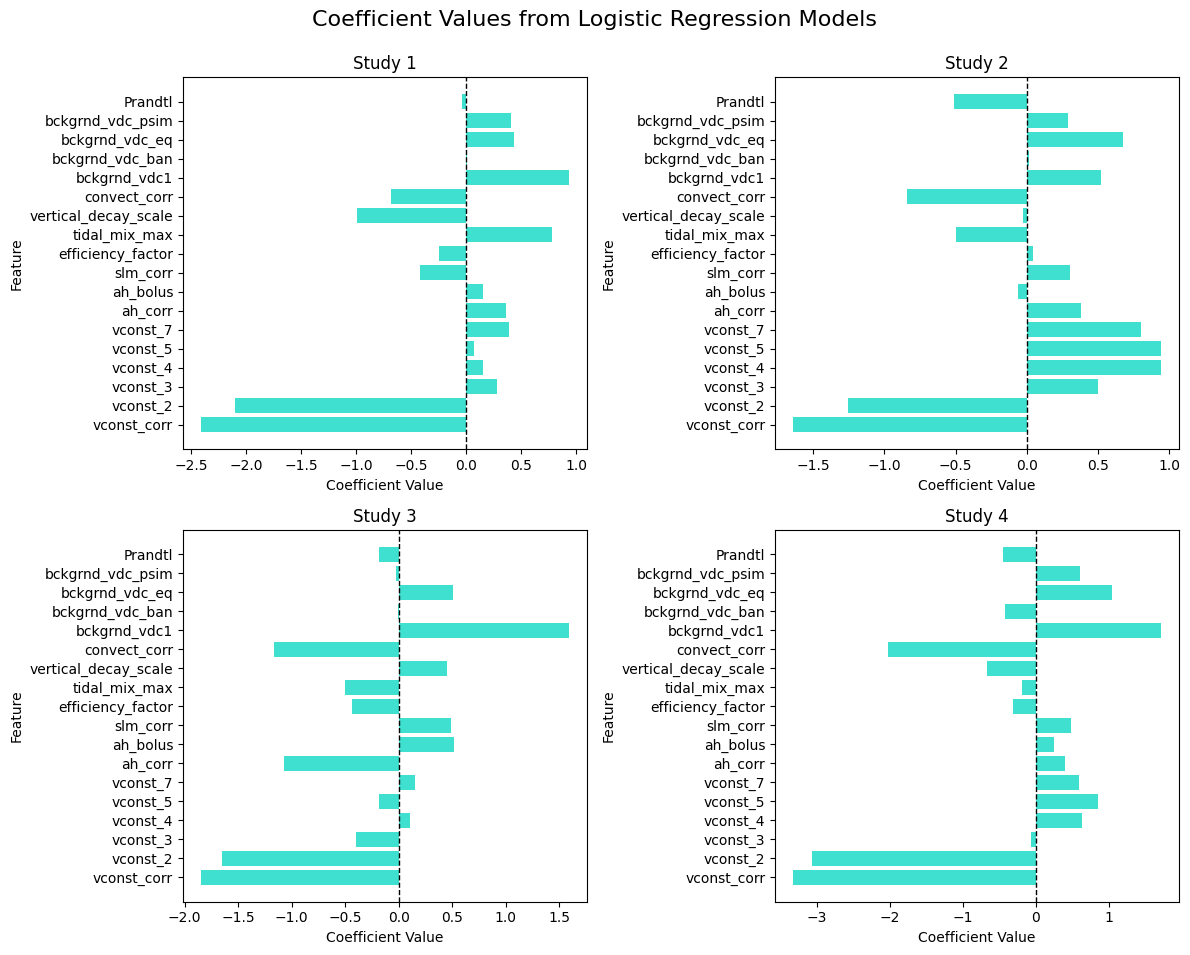

In [19]:
# Feature ranking/importances, using absolute coefficient value method

## Question asked to ChatGPT:
## "I want to perform feature ranking to 4 logistic regression models simutaneously using the absolute coefficient value method"

# Creating empty arrays/lists
feature_importances_list_lr_co = []
top_features_lr_abs = []
top_features_lr_co = []

# Training each model and getting feature importances
for i, (models, (x_train, y_train)) in enumerate(zip(trained_models_lr, train_data)):
    # Training the model
    models.fit(x_train, y_train)

    # Getting the absolute values of the coefficients for ranking
    abs_coefficients = np.abs(models.coef_).flatten()
    # Getting coefficients (positive and negative) for plotting
    coefficients = models.coef_.flatten()

    # Appending feature importances to the list
    feature_importances_list_lr_co.append(coefficients)

    # Getting top 6 features
    # Sorting the features based on their absolute coefficients
    sorted_indices_abs = np.argsort(abs_coefficients)[::-1]
    sorted_indices_co = np.argsort(coefficients)[::-1]

    # Selecting the top features
    top_features_abs = x_train.columns[sorted_indices_abs][:17]
    top_features_co = x_train.columns[sorted_indices_co][:17]

    # Appending top features to the list
    top_features_lr_abs.append(top_features_abs)
    top_features_lr_co.append(top_features_co)


# Printing top features
for i, top_features in enumerate(top_features_lr_abs):
    print(f"Top features for Study {i + 1}: {', '.join(top_features)}")


# Converting the list to a Numpy array for easier manipulation
feature_importances_array_lr_co = np.array(feature_importances_list_lr_co)

# Plotting the feature importances for each model
# Creating 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plotting feature ranking for each model
for i, ax in enumerate(axes):
    ax.barh(x_train.columns, feature_importances_array_lr_co[i], color='turquoise')
    #ax.barh(range(x_train.shape[1]), feature_importances_array_lr[i], color='blue')  # Use barh for horizontal bar chart
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Feature')
    ax.set_title(f'Study {i + 1}')

# Creating title and adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Coefficient Values from Logistic Regression Models', fontsize=16)
plt.show()

# Highest abs coefficient values show most important feature

Study 1 Top 3 Features: vconst_corr, vconst_2, vertical_decay_scale
Study 2 Top 3 Features: vconst_corr, vconst_2, vconst_4
Study 3 Top 3 Features: vconst_corr, vconst_2, bckgrnd_vdc1
Study 4 Top 3 Features: vconst_corr, vconst_2, convect_corr


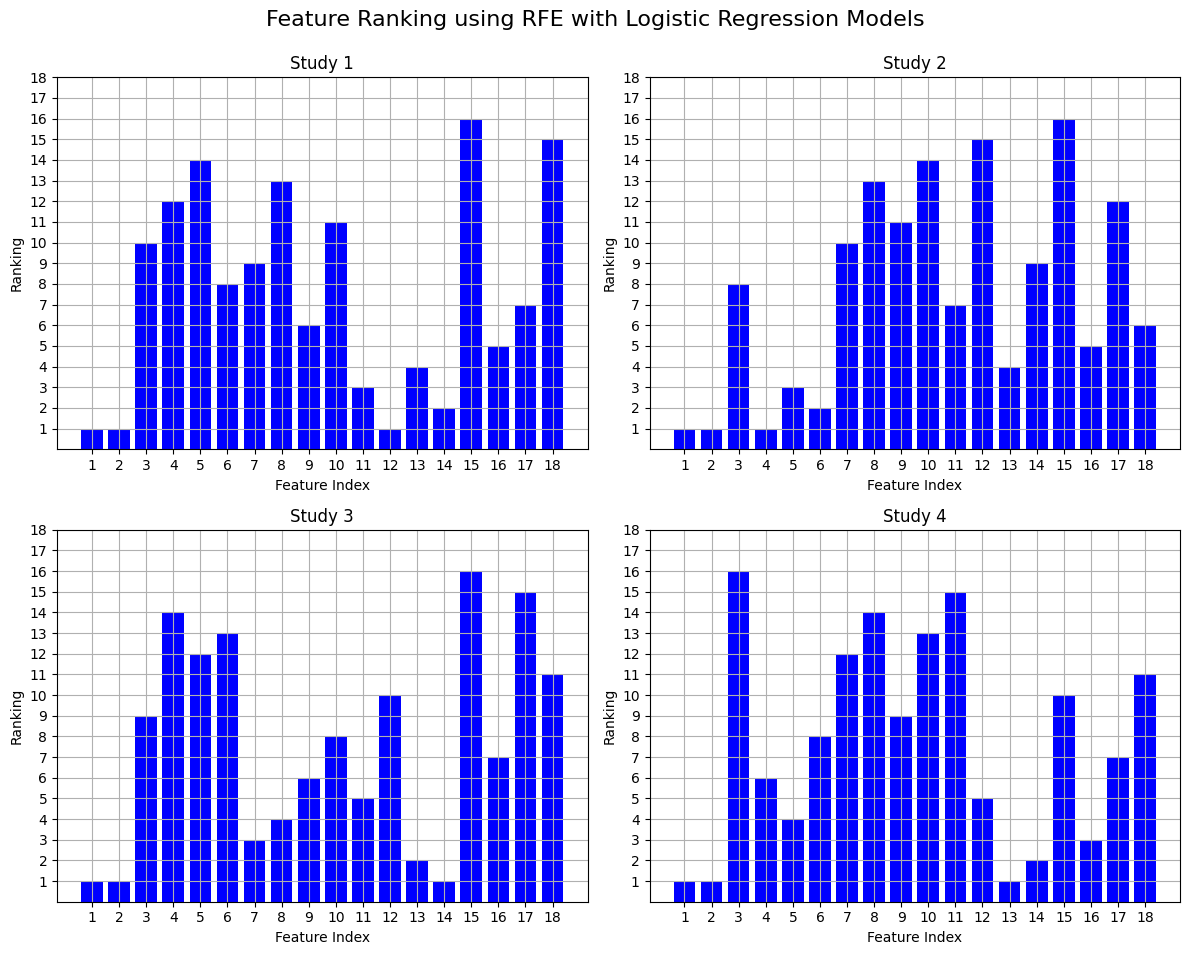

In [20]:
# Feature ranking/importances, using recursive feature elimination method

## Question asked to ChatGPT:
## "I want to perform feature ranking to 4 logistic regression models simutaneously using the RFE method"

from sklearn.feature_selection import RFE

# Number of features to select in each model
n_features_to_select = 3

# Empty lists to be filled
top_features = []
feature_rankings_lr_rfe = []


# Performing feature ranking with RFE for each model
for i, (models, (x_train, y_train)) in enumerate(zip(trained_models_lr, train_data)):

    # Creating RFE selector
    rfe_selector = RFE(estimator=models, n_features_to_select=n_features_to_select, step=1)

    # Fitting RFE to training data
    fit=rfe_selector.fit(x_train, y_train)

    # Obtaining feature ranking
    feature_ranking = rfe_selector.ranking_

    # Appending feature ranking to the empty list
    feature_rankings_lr_rfe.append(feature_ranking)

    # Extracting the top features
    top_feature_indices = fit.support_
    top_features_for_model = x_train.columns[top_feature_indices].tolist()
    top_features.append((f'Study {i+1}', top_features_for_model))

# Printing the top features
for model_name, model_top_features in top_features:
    print(f"{model_name} Top 3 Features: {', '.join(model_top_features)}")

# Converting the list to a Numpy array for easier manipulation
feature_rankings_array = np.array(feature_rankings_lr_rfe)

# Plotting the feature rankings for each model
# Creating 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plotting feature ranking for each model
for i, ax in enumerate(axes):
    ax.grid(True)
    ax.bar(range(x_train.shape[1]), feature_rankings_array[i], color='blue')
    ax.set_xticks(range(x_train.shape[1]))
    ax.set_xticklabels(range(1, x_train.shape[1] + 1))
    ax.set_xlabel('Feature Index')
    ax.set_ylabel('Ranking')
    ax.set_title(f'Study {i + 1}')
    ax.set_yticks(range(1,19,1))
    ax.set_yticklabels(range(1,19,1))

# Creating title and adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Feature Ranking using RFE with Logistic Regression Models', fontsize=16)
plt.show()

## Note: Did not use these graphs in my report, but used the list of top features
## Note: The larger the bar, the less important the feature is (eg. ranked #18)

# Support Vector Machine

In [21]:
# Training 4 SVM models simutaneously

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Recall
train_data = [(x_train_1, y_train_1), (x_train_2, y_train_2), (x_train_3, y_train_3), (x_train_tot, y_train_tot)]
test_data = [(x_test_1, y_test_1), (x_test_2, y_test_2), (x_test_3, y_test_3), (x_test_tot, y_test_tot)]

# Creating SVM training function
def train_SVM(data):
  X, Y = data
  svm = SVC(kernel='linear', C=1.0, probability=True)
  svm.fit(X, Y)
  return svm

# Simutaneously training the 4 models on respective data
processes = [multiprocessing.Process(target = train_SVM, args = (data,)) for data in train_data]

for process in processes:
  process.start()

for process in processes:
  process.join()

# Putting all trained models into one variable
trained_models_svm = [train_SVM(data) for data in train_data]

print(trained_models_svm)

[SVC(kernel='linear', probability=True), SVC(kernel='linear', probability=True), SVC(kernel='linear', probability=True), SVC(kernel='linear', probability=True)]


In [22]:
# Getting accuracy of each model

# Creating empty array to be filled
accuracies_svm = []

# Simutaneously calculating accuracy of 4 models
for svm, (x_test, y_test) in zip(trained_models_svm, test_data):
    accuracy = svm.score(x_test, y_test)
    accuracies_svm.append(accuracy)

# Printing accuracies of each model
for i, accuracy in enumerate(accuracies_svm):
    print(f'Study {i + 1} Accuracy: {accuracy:.4f}')

Study 1 Accuracy: 0.9412
Study 2 Accuracy: 0.9804
Study 3 Accuracy: 0.9608
Study 4 Accuracy: 0.9803


### Confusion Matrix - SVM

Precision- Study 1: 0.9375
Recall- Study 1: 1.0

Precision- Study 2: 0.9803921568627451
Recall- Study 2: 1.0

Precision- Study 3: 0.9607843137254902
Recall- Study 3: 1.0

Precision- Study 4: 0.9862068965517241
Recall- Study 4: 0.9930555555555556



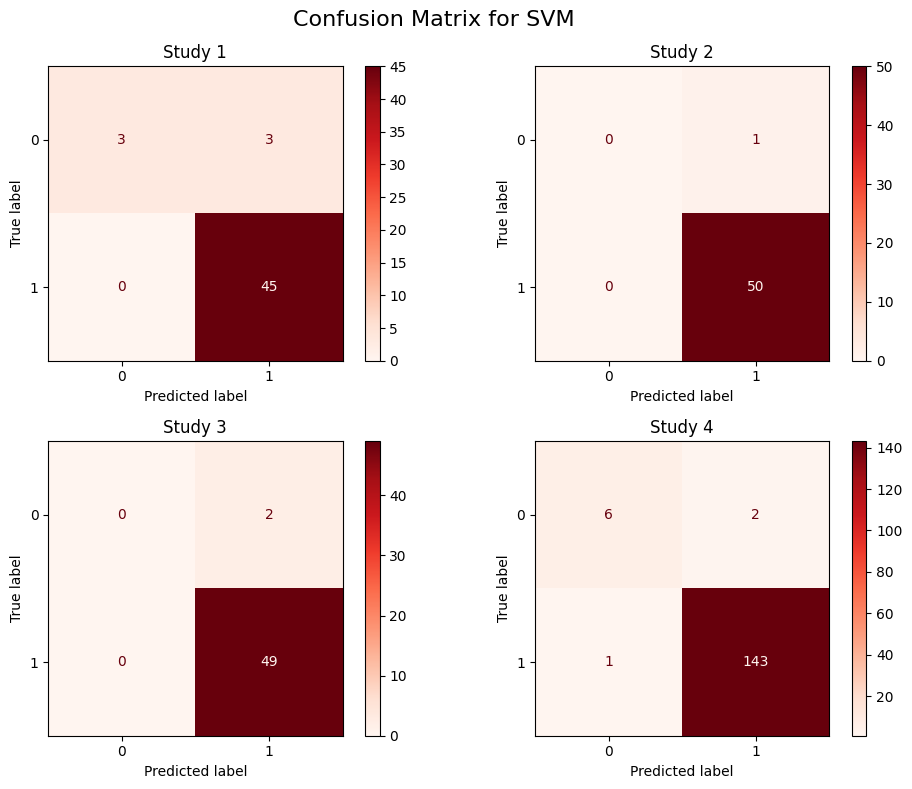

In [23]:
# Confusion matrix

# Creating 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flattening axs to easily iterate
axs = axs.flatten()

# Calculating 4 confusion matrices simutaneously
for i, (models, (x_test, y_test)) in enumerate(zip(trained_models_svm, test_data)):
    # Predicting model on test data
    y_pred = models.predict(x_test)

    # Creating confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix on the i-th subplot
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models.classes_)
    display.plot(cmap='Reds', values_format='d', ax=axs[i])
    axs[i].set_title(f'Study {i+1}')

    #Extra: Calculating Precision
    precision = cm[1,1] / (cm[1,1] + cm[0,1])

    #Calculating Recall
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    print(f'Precision- Study {i+1}:',precision)
    print(f'Recall- Study {i+1}:',recall)
    print()

# Making overall title and adjusting layout
fig.suptitle('Confusion Matrix for SVM', fontsize=16)

plt.tight_layout()
plt.show()

## compare these confusion matrixes with the logistic regression

### ROC Curve - SVM

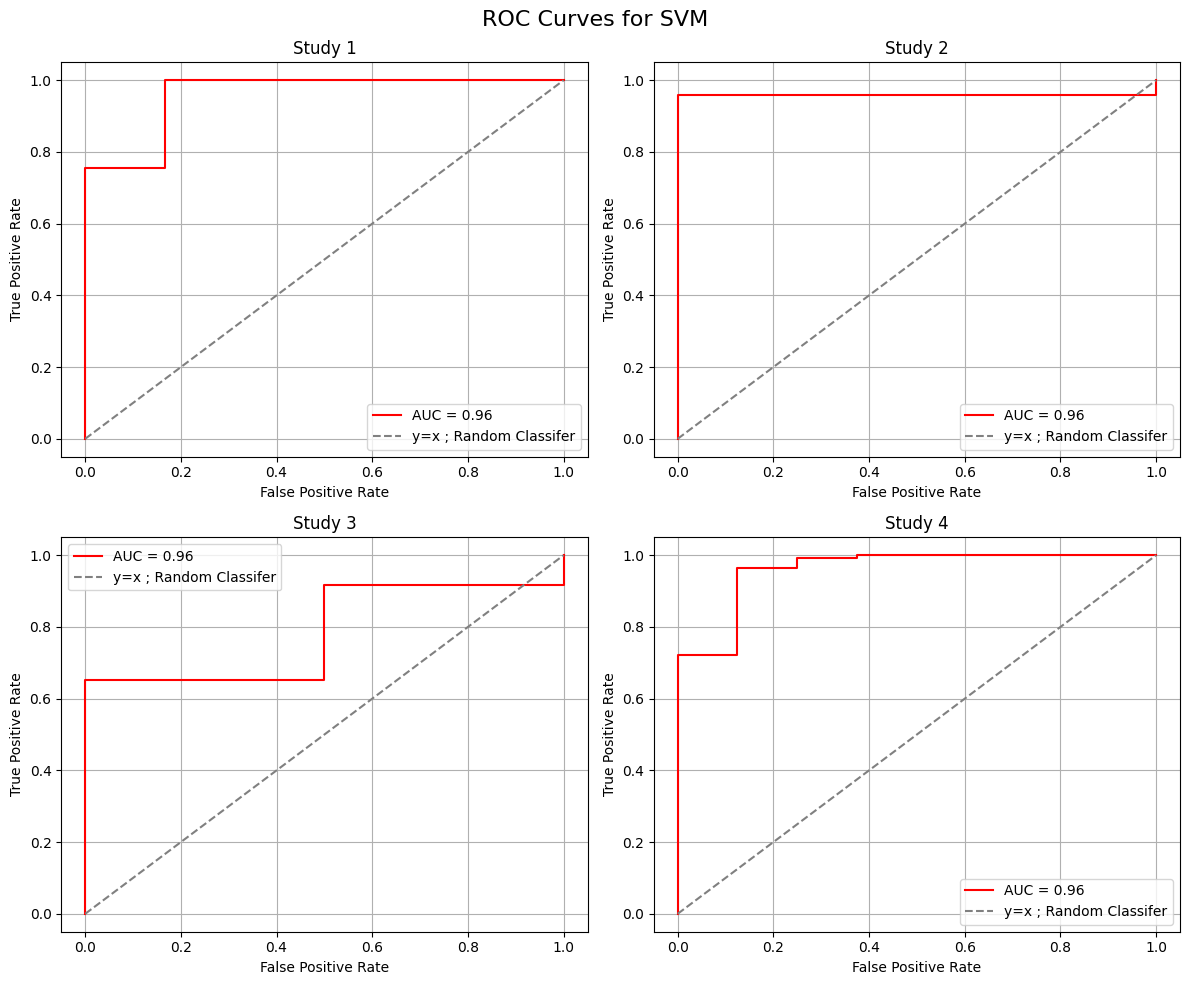

In [24]:
# Creating ROC Curves
# Creating 2x2 subplots & flattening axs to iterate
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plotting ROC curve and y=x line for each model on each subplot
for i, (models, (x_test, y_test)) in enumerate(zip(trained_models_svm, test_data)):
    #roc_display = RocCurveDisplay.from_estimator(models, x_test, y_test)
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    roc_display = RocCurveDisplay(fpr=false_pos_rate, tpr=true_pos_rate, roc_auc=roc_auc, estimator_name='SVM')

    x=np.linspace(0,1,100)
    y=x

    roc_display.plot(ax=axes[i], color='red', linestyle='-', label=f'AUC = {roc_auc:.2}')
    axes[i].plot(x, y, color='gray', linestyle='--', label='y=x ; Random Classifer')
    axes[i].set_title(f'Study {i + 1}')
    axes[i].grid(True)
    axes[i].legend()

# Making overall title and adjusting layout
fig.suptitle('ROC Curves for SVM', fontsize=16)
plt.tight_layout()
plt.show()

### Feature Ranking/Importances - SVM

Top features for Study 1: vconst_corr, vconst_2, vertical_decay_scale, convect_corr, bckgrnd_vdc1, bckgrnd_vdc_eq, tidal_mix_max, bckgrnd_vdc_psim, vconst_5, vconst_7, ah_corr, ah_bolus, Prandtl, vconst_4, vconst_3, efficiency_factor, bckgrnd_vdc_ban
Top features for Study 2: vconst_corr, vconst_2, vconst_4, vconst_7, vconst_5, convect_corr, bckgrnd_vdc1, bckgrnd_vdc_eq, vconst_3, Prandtl, slm_corr, tidal_mix_max, ah_corr, vertical_decay_scale, bckgrnd_vdc_ban, ah_bolus, efficiency_factor
Top features for Study 3: vconst_corr, bckgrnd_vdc1, vconst_2, ah_corr, convect_corr, ah_bolus, vertical_decay_scale, bckgrnd_vdc_eq, bckgrnd_vdc_ban, Prandtl, tidal_mix_max, vconst_4, slm_corr, efficiency_factor, vconst_3, vconst_7, vconst_5
Top features for Study 4: vconst_corr, vconst_2, convect_corr, bckgrnd_vdc1, bckgrnd_vdc_eq, vconst_5, bckgrnd_vdc_psim, vconst_4, slm_corr, vertical_decay_scale, vconst_7, tidal_mix_max, Prandtl, bckgrnd_vdc_ban, ah_corr, vconst_3, efficiency_factor


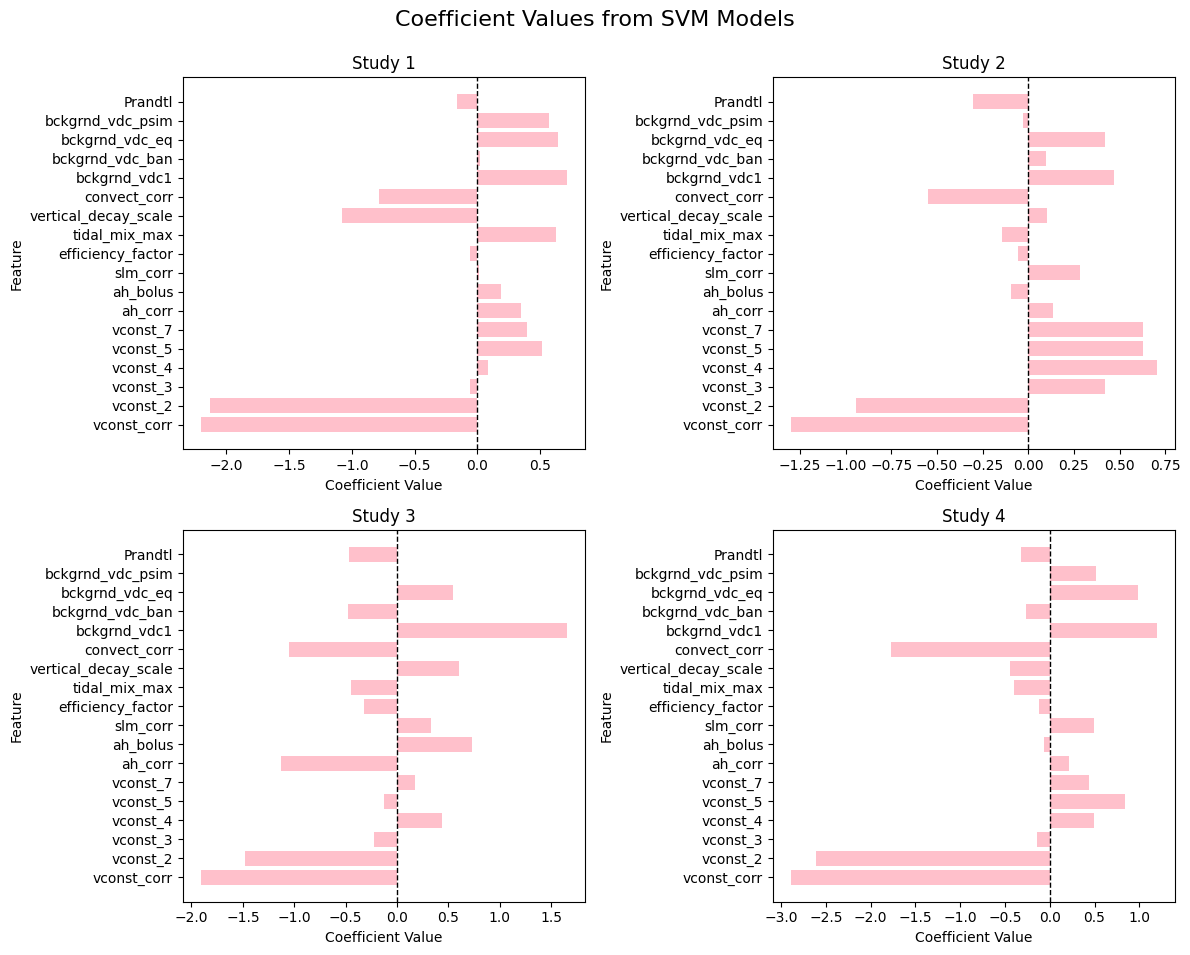

In [25]:
# Feature ranking/importances, using absolute coefficient value method

# Creating empty arrays/lists
feature_importances_list_svm_co = []
top_features_svm_abs = []
top_features_svm_co = []

# Training each model and getting feature importances
for i, (models, (x_train, y_train)) in enumerate(zip(trained_models_svm, train_data)):
    # Training the model
    models.fit(x_train, y_train)

    # Getting the absolute values of the coefficients for ranking
    abs_coefficients = np.abs(models.coef_).flatten()
    # Getting coefficients (positive and negative) for plotting
    coefficients = models.coef_.flatten()

    # Appending feature importances to the list
    feature_importances_list_svm_co.append(coefficients)

    # Getting top 6 features
    # Sorting the features based on their absolute coefficients
    sorted_indices_abs = np.argsort(abs_coefficients)[::-1]
    sorted_indices_co = np.argsort(coefficients)[::-1]

    # Selecting the top features
    top_features_abs = x_train.columns[sorted_indices_abs][:17]
    top_features_co = x_train.columns[sorted_indices_co][:17]

    # Appending top features to the list
    top_features_svm_abs.append(top_features_abs)
    top_features_svm_co.append(top_features_co)

# Printing top features
for i, top_features in enumerate(top_features_svm_abs):
    print(f"Top features for Study {i + 1}: {', '.join(top_features)}")

# Converting the list to a Numpy array for easier manipulation
feature_importances_array_svm_co = np.array(feature_importances_list_svm_co)

# Plotting the feature importances for each model
# Creating 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plotting feature ranking for each model
for i, ax in enumerate(axes):
    ax.barh(x_train.columns, feature_importances_array_svm_co[i], color='pink')
    #ax.barh(range(x_train.shape[1]), feature_importances_array_lr[i], color='blue')  # Use barh for horizontal bar chart
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Feature')
    ax.set_title(f'Study {i + 1}')

# Adjusting layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Coefficient Values from SVM Models', fontsize=16)
plt.show()

Study 1 Top 3 Features: vconst_corr, vconst_2, vertical_decay_scale
Study 2 Top 3 Features: vconst_corr, vconst_2, vconst_5
Study 3 Top 3 Features: vconst_corr, vconst_2, bckgrnd_vdc1
Study 4 Top 3 Features: vconst_corr, vconst_2, bckgrnd_vdc1


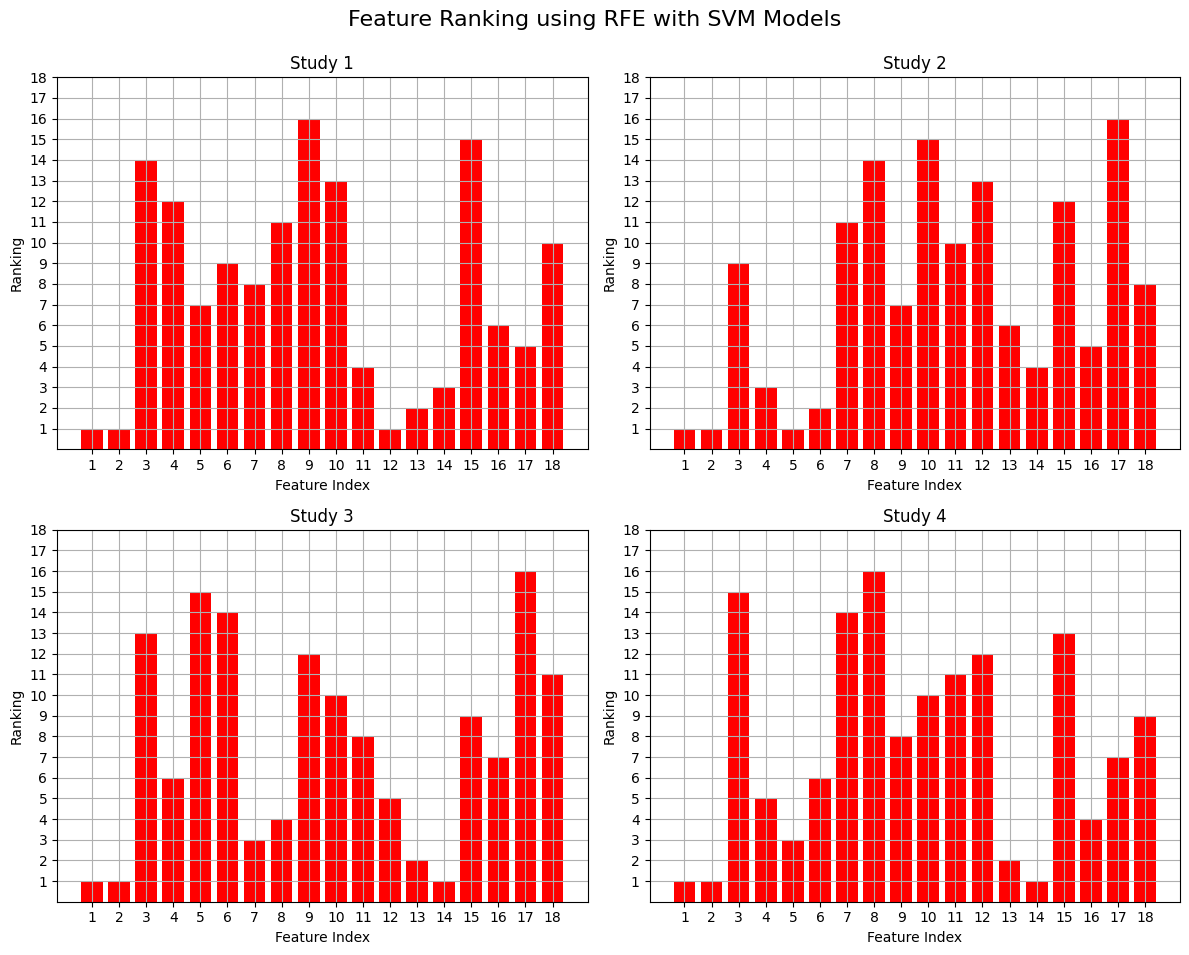

In [26]:
# Feature ranking/importances, using recursive feature elimination method

feature_rankings_list_svm_rfe = []

# Number of features to select in each model
n_features_to_select = 3

# Empty lists to be filled
top_features = []
feature_rankings_svm_rfe = []

# Performing feature ranking with RFE for each model
for i, (models, (x_train, y_train)) in enumerate(zip(trained_models_svm, train_data)):
    # Creating RFE selector
    rfe_selector = RFE(estimator=models, n_features_to_select=n_features_to_select, step=1)

    # Fitting RFE to training data
    fit = rfe_selector.fit(x_train, y_train)

    # Obtaining feature ranking
    feature_ranking = rfe_selector.ranking_

    # Appending feature ranking to the empty list
    feature_rankings_list_svm_rfe.append(feature_ranking)

    # Extracting the top features
    top_feature_indices = fit.support_
    top_features_for_model = x_train.columns[top_feature_indices].tolist()
    top_features.append((f'Study {i+1}', top_features_for_model))

# Printing the top features
for model_name, model_top_features in top_features:
    print(f"{model_name} Top 3 Features: {', '.join(model_top_features)}")

# Converting the list to a Numpy array for easier manipulation
feature_rankings_array = np.array(feature_rankings_list_svm_rfe)

# Plotting the feature rankings for each model
# Creating 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plotting feature ranking for each model
for i, ax in enumerate(axes):
    ax.grid(True)
    ax.bar(range(x_train.shape[1]), feature_rankings_array[i], color='red')
    ax.set_xticks(range(x_train.shape[1]))
    ax.set_xticklabels(range(1, x_train.shape[1] + 1))
    ax.set_yticks(range(1,19,1))
    ax.set_yticklabels(range(1,19,1))
    ax.set_xlabel('Feature Index')
    ax.set_ylabel('Ranking')
    ax.set_title(f'Study {i + 1}')


# Creating title and adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Feature Ranking using RFE with SVM Models', fontsize=16)
plt.show()

# End of code. Thank you!